# The Lotka-Volterra model
This model is a python translation of the LV_pz model proposed in Glover et al. (2011), Sec. 9.3

You will need to make sure the required modules below are installed in your python environment

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

This is the function containing the right hand side of the ODE system

In [2]:
def LV_pz(x,t,p):
    X1,X2 = x
    p1,p2,p3,p4 = p
    dX1dt = X1 * (p1 - p2*X2)
    dX2dt = X2 * (p3*p2*X1 - p4)
    return np.array([dX1dt,dX2dt])

## Parameters and initial conditions

In [3]:
# The parameters
p = np.array([0.1,0.4,0.2,0.05])
X1_0 = 0.8
X2_0 = 0.171
x0 = np.array([X1_0,X2_0])

## Time axis

In [4]:
# time units are days
Tstart = 0.
Tend = 400.
step = 0.1
t = np.arange(Tstart,Tend,step)

## Integration using the scipy ODE solver

In [5]:
# note that the extra argument containing the parameter "args" must be a tuple
y = odeint(LV_pz, x0, t, args=(p,))

## Plot Fig. 9.3a

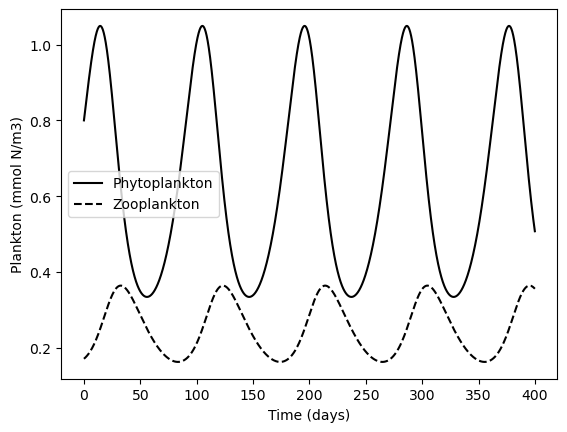

In [6]:
plt.plot(t,y[:,0],'k-',label='Phytoplankton')
plt.plot(t,y[:,1],'k--',label='Zooplankton')
plt.xlabel('Time (days)')
plt.ylabel('Plankton (mmol N/m3)')
plt.legend()
plt.show()

# Exercise 3
**1. Write the code to plot Fig. 9.3b, the trajectory in the phase space**

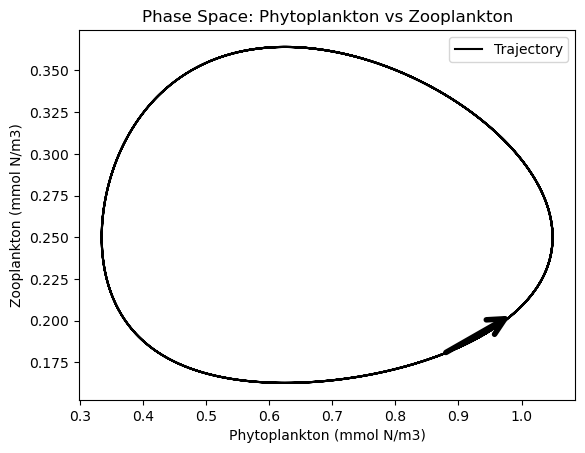

In [12]:
import matplotlib.pyplot as plt

plt.plot(y[:, 0], y[:, 1], 'k-', label='Trajectory')
plt.xlabel('Phytoplankton (mmol N/m3)')
plt.ylabel('Zooplankton (mmol N/m3)')
plt.title('Phase Space: Phytoplankton vs Zooplankton')
plt.legend()

# Add a curved arrow along the trajectory to indicate the direction of time
arrow_position = 0.7  # Place the arrow on the trajectory to indicate time
arrow_index = int(len(y) * arrow_position)  # Index corresponding to the arrow position

plt.annotate('', xy=(y[arrow_index, 0], y[arrow_index, 1]), xytext=(y[arrow_index-50, 0], y[arrow_index-50, 1]),
             arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=4, mutation_scale=30))

plt.show()

**2. Set the parameter p3=1 and compare how different the trajectory is in the phase space**

In [15]:
def LV_pz(x, t, p):
    """
    Define the system of ODEs for the Lotka-Volterra model with zooplankton predation.

    Parameters:
        x (array_like): Array containing the state variables (x[0] = phytoplankton, x[1] = zooplankton).
        t (float): Time variable (not used in this model but required by odeint).
        p (array_like): Array containing the model parameters (p[0] = p1, p[1] = p2, p[2] = p3, p[3] = p4).

    Returns:
        dxdt (array_like): Array containing the derivatives of the state variables.
    """
    p1, p2, p3, p4 = p
    dxdt = np.array([
        p1 * x[0] - p2 * x[0] * x[1],
        -p3 * x[1] + p2 * x[0] * x[1]
    ])
    return dxdt

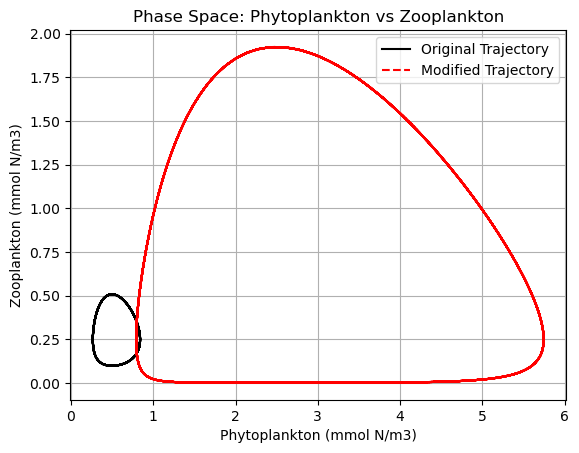

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Original parameters
p_original = np.array([0.1, 0.4, 0.2, 0.05])
X1_0 = 0.8
X2_0 = 0.171
x0 = np.array([X1_0, X2_0])

# Modified parameter
p_modified = np.array([0.1, 0.4, 1, 0.05])

# Time array
Tstart = 0.
Tend = 400.
step = 0.1
t = np.arange(Tstart, Tend, step)

# Solve ODEs for original parameters
y_original = odeint(LV_pz, x0, t, args=(p_original,))

# Solve ODEs for modified parameters
y_modified = odeint(LV_pz, x0, t, args=(p_modified,))

# Plot phase space with both trajectories
plt.plot(y_original[:, 0], y_original[:, 1], 'k-', label='Original Trajectory')
plt.plot(y_modified[:, 0], y_modified[:, 1], 'r--', label='Modified Trajectory')
plt.xlabel('Phytoplankton (mmol N/m3)')
plt.ylabel('Zooplankton (mmol N/m3)')
plt.title('Phase Space: Phytoplankton vs Zooplankton')
plt.legend()
plt.grid(True)
plt.show()

The trajectory is less oval and more triangular, with more of a trajectory in both the y and the x directions.

**3. Write the code to compute the solution of the L-V model using the initial conditions given in the caption of Fig. 9.4**

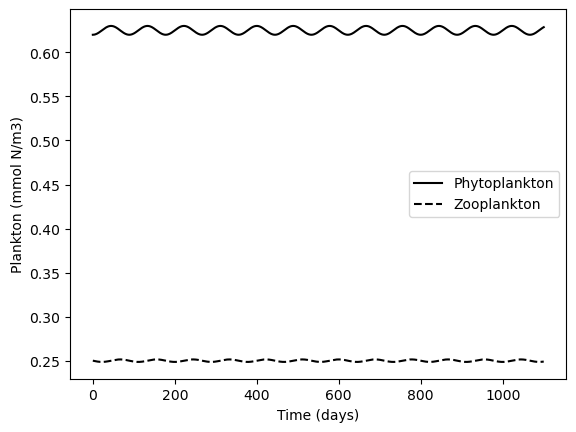

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
def LV_pz(x,t,p):
    X1,X2 = x
    p1,p2,p3,p4 = p
    dX1dt = X1 * (p1 - p2*X2)
    dX2dt = X2 * (p3*p2*X1 - p4)
    return np.array([dX1dt,dX2dt])
# Redefine the initial conditions and time range
X1_0 = 0.62
X2_0 = 0.25
x0 = np.array([X1_0, X2_0])
Tstart = 0.
Tend = 1100.
step = 0.1
y = odeint(LV_pz, x0, t, args=(p,))
t = np.arange(Tstart,Tend,step)

plt.plot(t,y[:,0],'k-',label='Phytoplankton')
plt.plot(t,y[:,1],'k--',label='Zooplankton')
plt.xlabel('Time (days)')
plt.ylabel('Plankton (mmol N/m3)')
plt.legend()
plt.show()

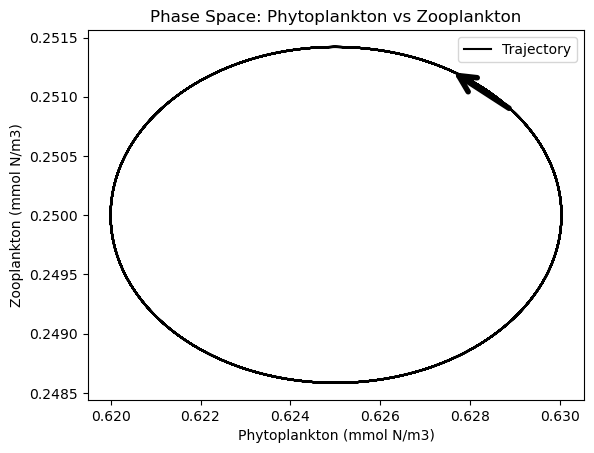

In [28]:
import matplotlib.pyplot as plt

# Assuming y array is defined with the same parameters

plt.plot(y[:, 0], y[:, 1], 'k-', label='Trajectory')
plt.xlabel('Phytoplankton (mmol N/m3)')
plt.ylabel('Zooplankton (mmol N/m3)')
plt.title('Phase Space: Phytoplankton vs Zooplankton')
plt.legend()

# Add a curved arrow along the trajectory to indicate the direction of time
arrow_position = 0.7  # Place the arrow on the trajectory to indicate time
arrow_index = int(len(y) * arrow_position)  # Index corresponding to the arrow position

# Adjust arrow position and index according to the length of the y array
plt.annotate('', xy=(y[arrow_index, 0], y[arrow_index, 1]), xytext=(y[arrow_index-50, 0], y[arrow_index-50, 1]),
             arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=4, mutation_scale=30))

plt.show()

**4. Do you get the same results? Why not? See the errata in the document Glover_etal_2011_ERRATA.pdf to understand more {no need to fully understand the stability analysis ;)}**

No, the second diagram showing the trajectory does not spiral outward in my diagram. The diagram in the book was computed using no computer software whilst this diagram was made using Python. According to the errata,the difference in the observed versus the expected diagram is due to an "unfavorable interaction between truncation and roundoff errors in the numerical solution". Python does not make this mistake and thus the diagram is always a closed loop.